## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [ ]:
import numpy as np
a = list(map(int, input().split()))
s = len(a) // 2
a1 = a[:s] + a[:s-1:-1]
a1

In [51]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
str1 = a[1:5:2]
str2 = a[-4:-1:2]
a[1:5:2], a[-4:-1:2] = str2, str1
a

[1, 5, 3, 7, 2, 6, 4, 8]

Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца.

## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [52]:
ans = [i ** 2 for i in a]
ans

[1, 25, 9, 49, 4, 36, 16, 64]

Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять.

In [53]:
ans1 = [(i-5) for i in a]
ans1

[-4, 0, -2, 2, -3, 1, -1, 3]

## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке.

In [55]:
n = input()
print(ord(max(n)) - ord(min(n)))

abcde
e
4


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру.

In [58]:
n = n.upper()
print(''.join(sorted(n)))

ABCDE


## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [ ]:
A = list(map(int, input().split()))
A = np.array(A)
B = A.reshape(-1, 4)
B

1 2 3 4 5 6 7 8


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [ ]:
def binary(a):
    bits = 8
    t = np.array([list(np.binary_repr(x, width = bits)) for x in a], dtype = int)
    return t

B = binary(A)
B

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0]])

## Pandas

https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.

In [62]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/laptop_price.csv", encoding = 'latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [63]:
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)$')
df['Width'] = df['Width'].astype(int)
df['Height'] = df['Height'].astype(int)


df[['CpuType', 'CpuFreq']] = df['Cpu'].str.extract(r'(.+) (\d+\.\d+)GHz')
df['CpuFreq'] = df['CpuFreq'].astype(float)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Width,Height,CpuType,CpuFreq
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,3.1


<Axes: >

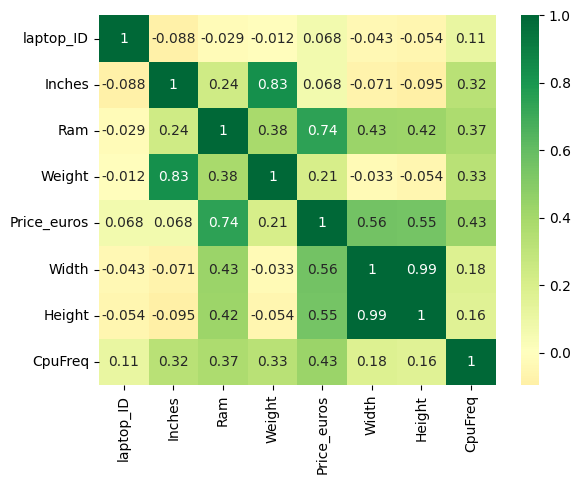

In [64]:
df1 = df._get_numeric_data()
sns.heatmap(df1.corr(), xticklabels=df1.corr().columns, yticklabels=df1.corr().columns, cmap='RdYlGn', center=0, annot=True)

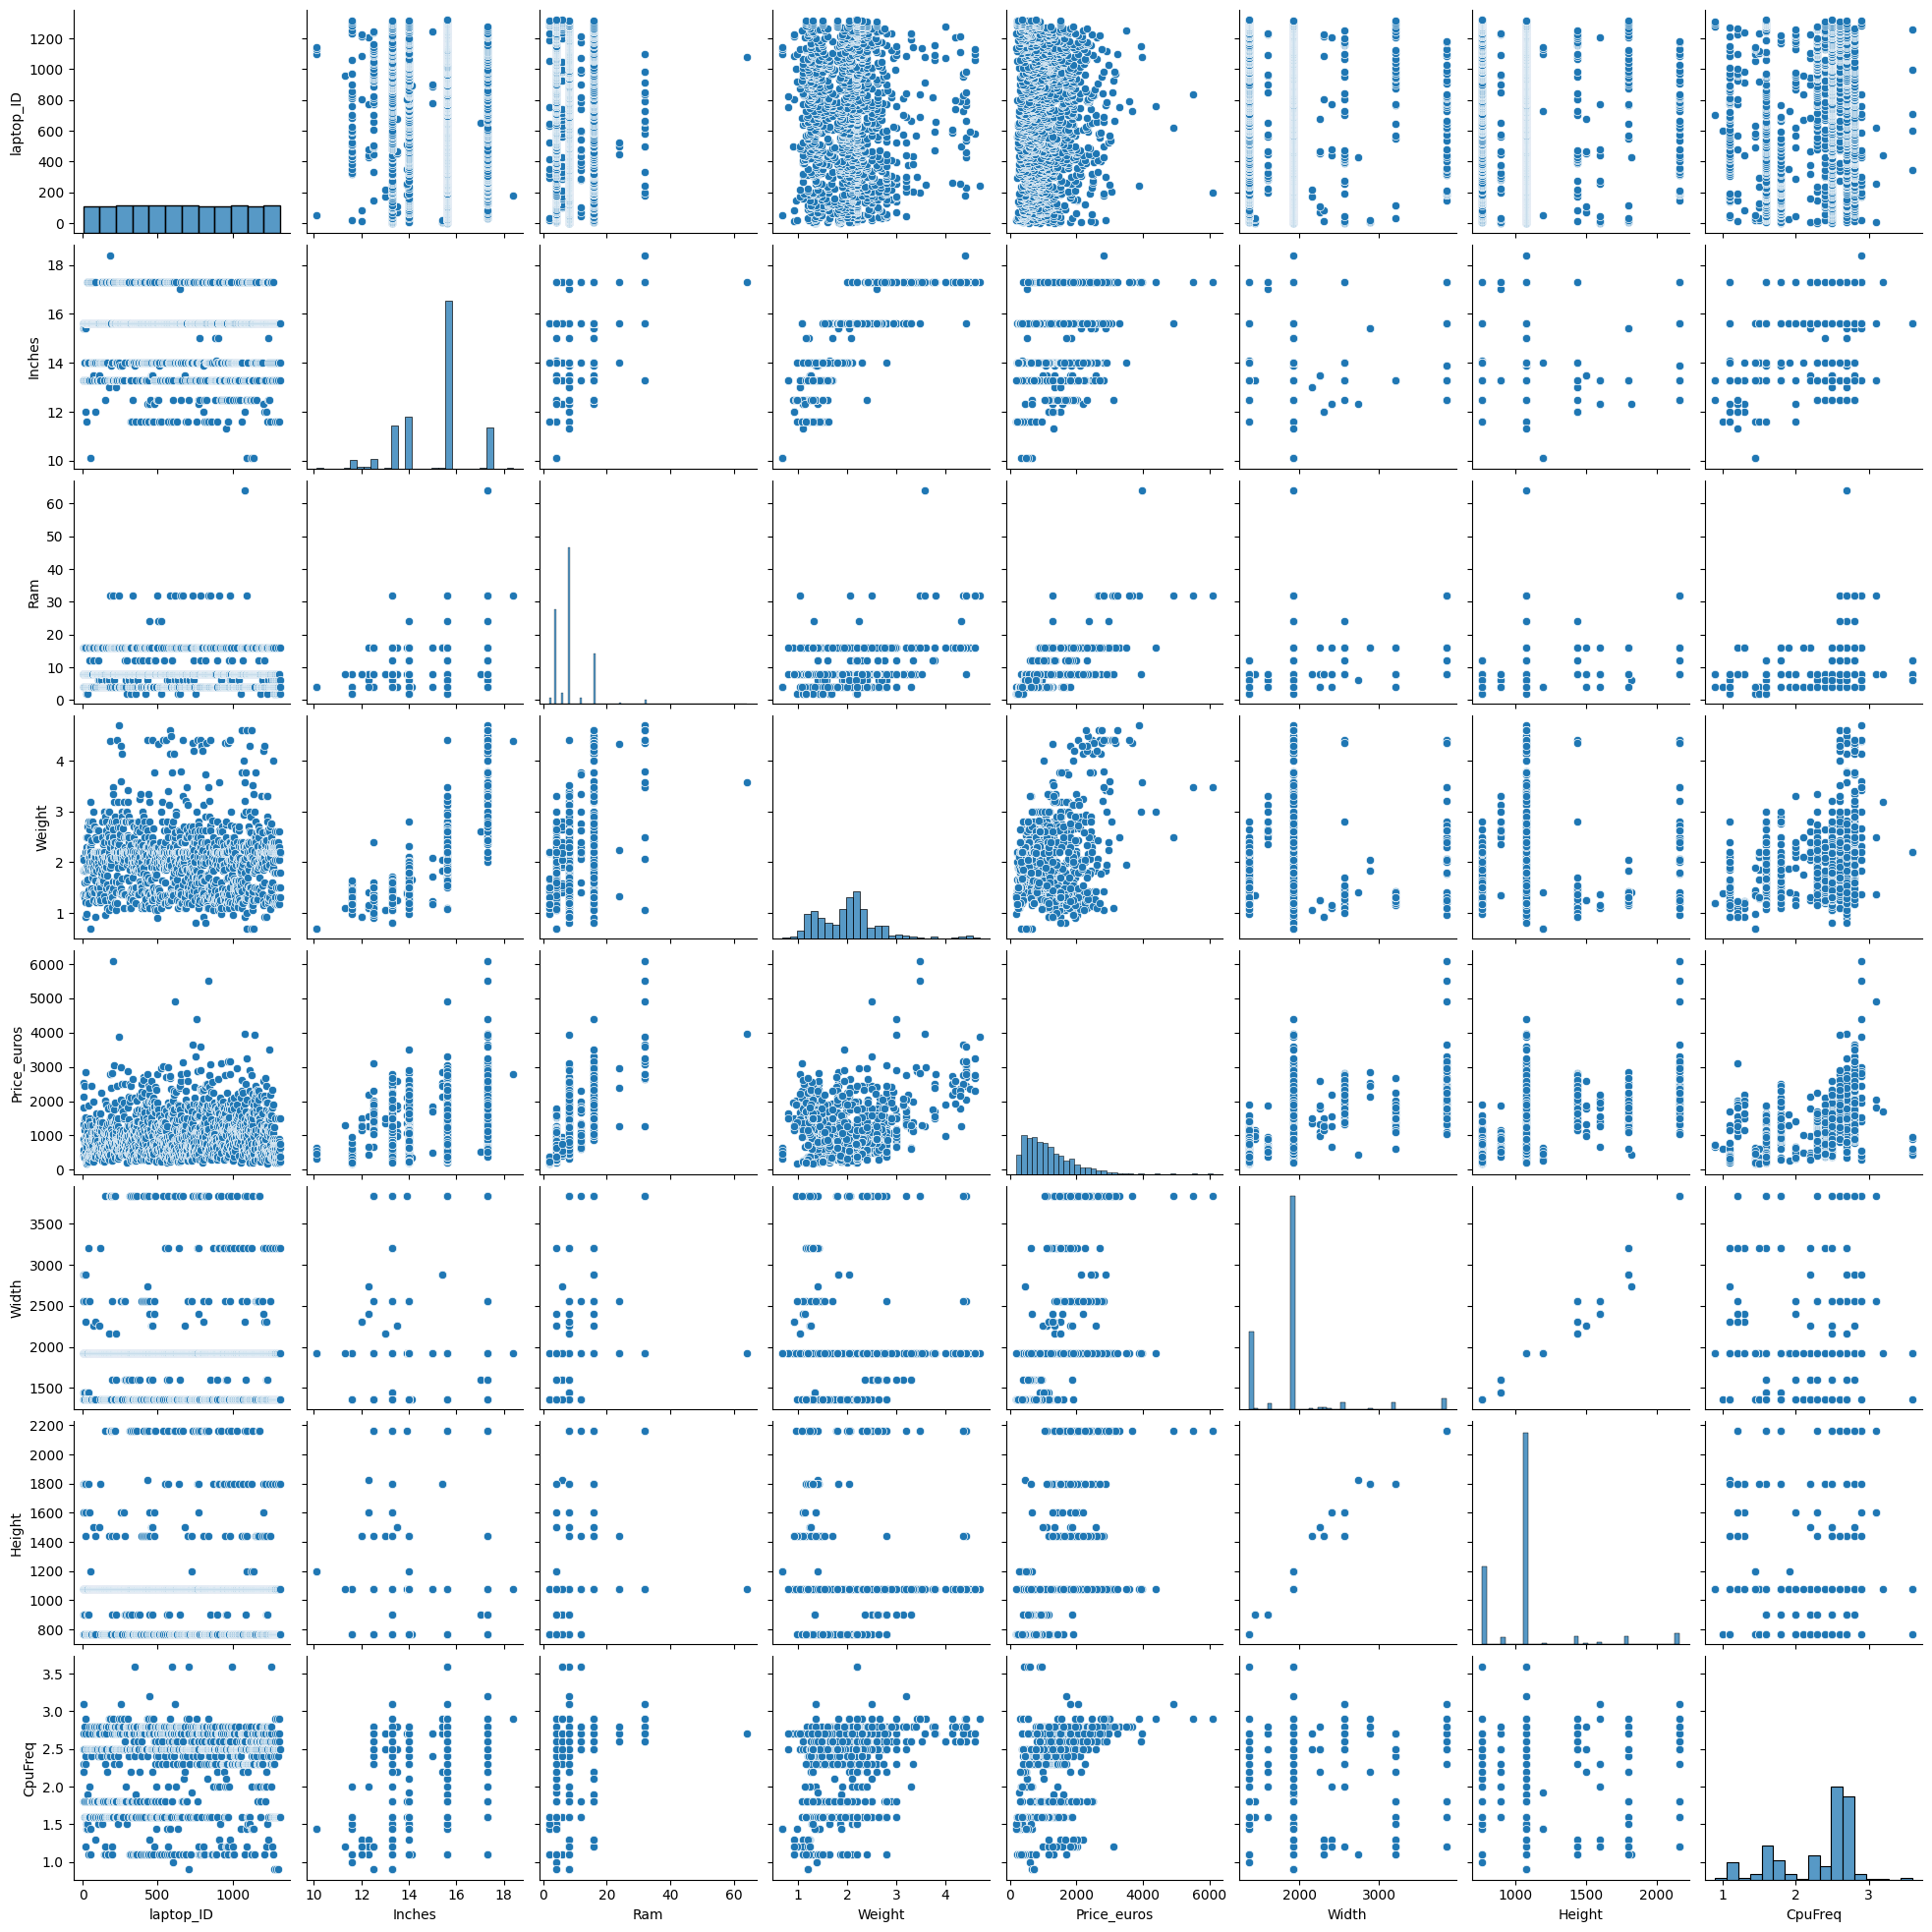

In [ ]:
sns.pairplot(df)

<Figure size 2000x800 with 0 Axes>

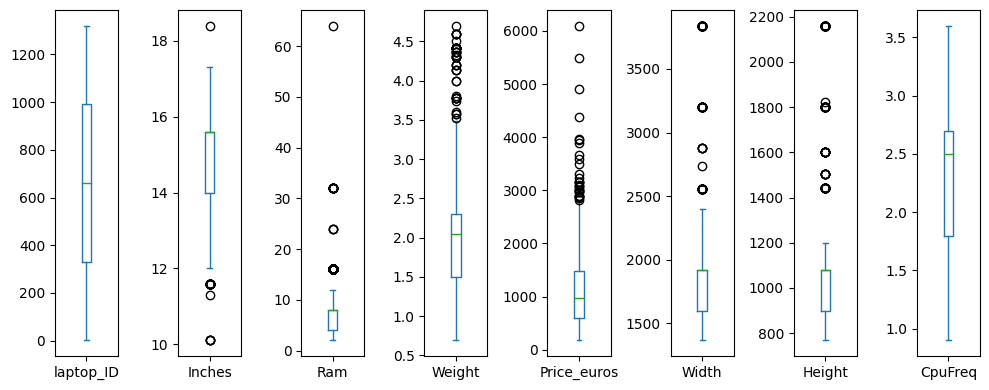

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
df_numeric = df.select_dtypes(include='number')
df_numeric.plot(kind='box', subplots=True, figsize=(10, 4))
plt.tight_layout()

RangeIndex(start=0, stop=1303, step=1)

In [ ]:
for col in df1:
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df1[col] < Q1 - 1.5 * IQR) | (df1[col] > Q3 + 1.5 * IQR)]
  if not outliers.empty:
      print(f'Выбросы для {col}:')
      print(outliers)

Выбросы для Inches:
      laptop_ID   Company                               Product  \
20           21      Asus                       Vivobook E200HA   
50           51    Lenovo                             Yoga Book   
177         181       MSI                       GT80S 6QF-074US   
314         319      Asus                         VivoBook Flip   
319         324      Acer                          TravelMate B   
348         354      Asus                         VivoBook Flip   
376         382    Lenovo                              Yoga 11e   
409         416    Lenovo                        Lenovo IdeaPad   
429         436  Mediacom                         FlexBook Edge   
430         437   Samsung                          Chromebook 3   
455         462      Dell                         Inspiron 3168   
461         468      Acer                          TravelMate B   
500         507      Asus                       VivoBook E201NA   
504         511    Lenovo                 

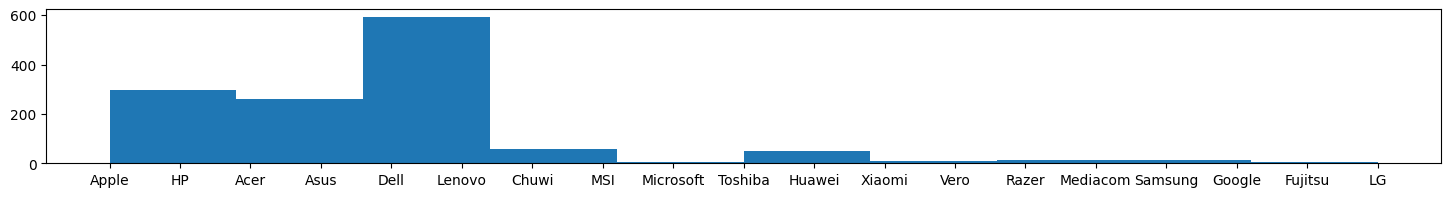

In [ ]:


fig, ax = plt.subplots(figsize = (18, 2))
x = df['Company']
ax.hist(x)



plt.show()